3

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST Fashion dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

Epoch 1/20
235/235 [==============================] - 44s 172ms/step - loss: 0.4019 - val_loss: 0.3637
Epoch 2/20
235/235 [==============================] - 40s 172ms/step - loss: 0.3566 - val_loss: 0.3500
Epoch 3/20
235/235 [==============================] - 40s 171ms/step - loss: 0.3427 - val_loss: 0.3395
Epoch 4/20
235/235 [==============================] - 40s 170ms/step - loss: 0.3406 - val_loss: 0.3348
Epoch 5/20
235/235 [==============================] - 40s 171ms/step - loss: 0.3371 - val_loss: 0.3380
Epoch 6/20
235/235 [==============================] - 43s 181ms/step - loss: 0.3318 - val_loss: 0.3386
Epoch 7/20
235/235 [==============================] - 53s 226ms/step - loss: 0.3303 - val_loss: 0.3278
Epoch 8/20
235/235 [==============================] - 53s 226ms/step - loss: 0.3364 - val_loss: 0.3271
Epoch 9/20
235/235 [==============================] - 53s 226ms/step - loss: 0.3292 - val_loss: 0.3250
Epoch 10/20
235/235 [==============================] - 53s 226ms/step - l

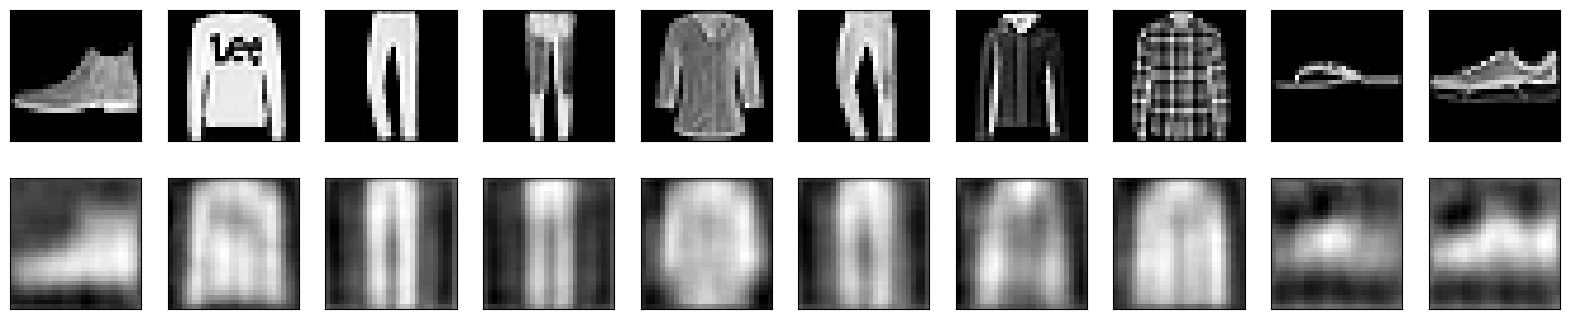

In [4]:
# Encoder
x = Conv2D(16, (3, 3), activation='linear', padding='same', strides = 1)(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same', strides = 1)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same', strides = 1)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='linear', padding='same', strides = 1)(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='linear', padding='same', strides = 1)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='linear', strides = 1)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='linear', padding='same', strides = 1)(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/20
235/235 [==============================] - 45s 179ms/step - loss: 0.4912 - val_loss: 0.3758
Epoch 2/20
235/235 [==============================] - 42s 177ms/step - loss: 0.3577 - val_loss: 0.3453
Epoch 3/20
235/235 [==============================] - 42s 177ms/step - loss: 0.3394 - val_loss: 0.3351
Epoch 4/20
235/235 [==============================] - 42s 178ms/step - loss: 0.3324 - val_loss: 0.3358
Epoch 5/20
235/235 [==============================] - 41s 175ms/step - loss: 0.3378 - val_loss: 0.3615
Epoch 6/20
235/235 [==============================] - 41s 176ms/step - loss: 0.3461 - val_loss: 0.3531
Epoch 7/20
235/235 [==============================] - 41s 175ms/step - loss: 0.3328 - val_loss: 0.3338
Epoch 8/20
235/235 [==============================] - 41s 174ms/step - loss: 0.3262 - val_loss: 0.3240
Epoch 9/20
235/235 [==============================] - 43s 184ms/step - loss: 0.3219 - val_loss: 0.3238
Epoch 10/20
235/235 [==============================] - 51s 216ms/step - l

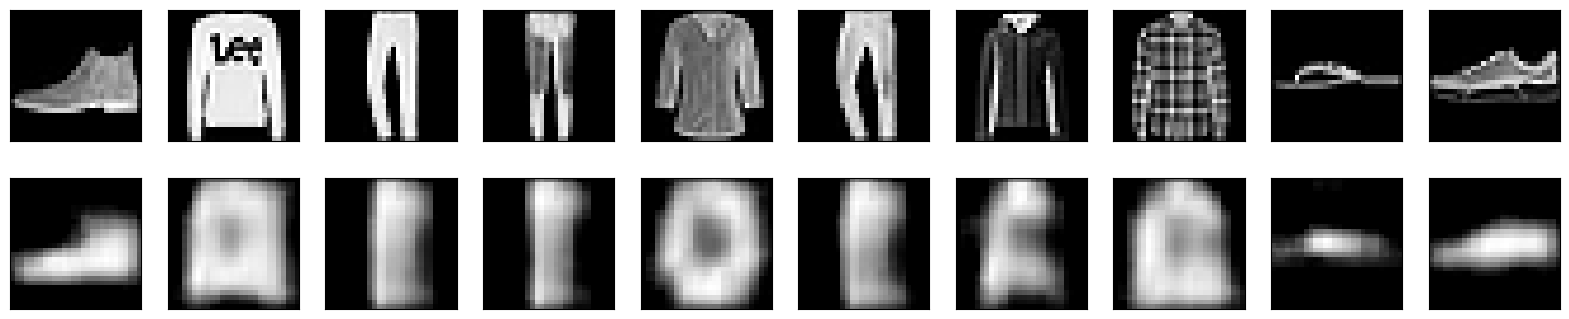

In [6]:
# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides = 1)(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same', strides = 1)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same', strides = 1)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same', strides = 1)(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same', strides = 1)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', strides = 1)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same', strides = 1)(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [45]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
X = mnist.data
X = X / 255.0
n_components = 50  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

c:\Users\rvacher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


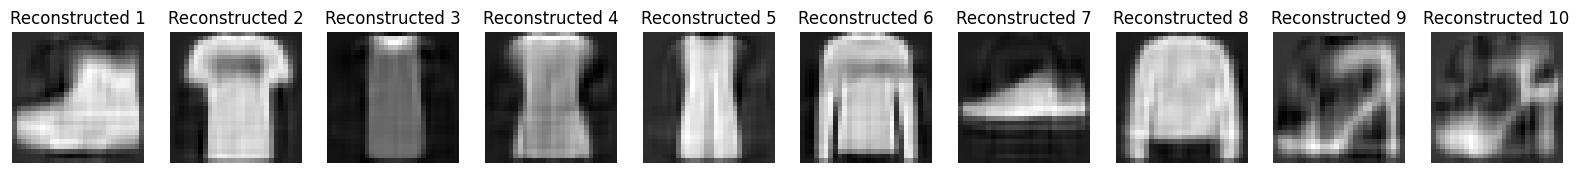

In [46]:
X_reconstructed = pca.inverse_transform(X_pca)
reconstructed_images = X_reconstructed.reshape(-1, 28, 28)

n_images_to_plot = 10  # Number of images to plot

plt.figure(figsize=(20, 4))
for i in range(n_images_to_plot):
    # Reconstructed Image
    plt.subplot(2, n_images_to_plot, i + 1 + n_images_to_plot)
    plt.imshow(reconstructed_images[i], cmap="gray")
    plt.title(f"Reconstructed {i + 1}")
    plt.axis("off")

plt.show()


In [47]:
from sklearn.metrics import mean_squared_error
Xx = X.to_numpy()

# Calculate the MSE for each image in the dataset
mse_list = []
for i in range(len(X)):
    mse = mean_squared_error(Xx[i], X_reconstructed[i])
    mse_list.append(mse)

# Calculate the mean reconstruction error
mean_reconstruction_error = np.mean(mse_list)

print(f"Mean Reconstruction Error: {mean_reconstruction_error:.4f}")


Mean Reconstruction Error: 0.0120


1

In [27]:
import numpy as np
np.random.seed(40)
data = np.random.normal(0, 1, size = 20)

In [20]:
from scipy.stats import gamma, norm

def generate_gaussian_samples(mean, precision, num_samples):
    samples = norm.rvs(loc=mean, scale=np.sqrt(1/precision), size=num_samples)
    return samples

def calculate_q_mu(samples, mu_N, lambda_N):
    return norm.pdf(samples, loc=mu_N, scale=np.sqrt(1/lambda_N))

def calculate_q_tau(samples, a_N, b_N):
    return gamma.pdf(samples, a_N, scale=1/b_N)

def variational_inference_algorithm(num_samples, iter_max, gaussian_samples):
    # Initialize parameters
    mu_N = 0
    lambda_N = 1.2
    a_N = 1
    b_N = 1

    for iteration in range(iter_max):
        # Update q(μ)
        q_mu = calculate_q_mu(gaussian_samples, mu_N, lambda_N)
        mu_N = np.sum(gaussian_samples * q_mu) / np.sum(q_mu)
        lambda_N = num_samples / np.sum(q_mu)

        # Update q(τ)
        q_tau = calculate_q_tau(gaussian_samples, a_N, b_N)
        a_N = 1 + num_samples / 2
        b_N = 1 + 0.5 * np.sum(q_mu * (gaussian_samples - mu_N) ** 2) + np.sum(q_tau)

        if iteration >= iter_max:
            break

    return mu_N, lambda_N, a_N, b_N

In [21]:
iter_max = 50
mu_N, lambda_N, a_N, b_N = variational_inference_algorithm(20, iter_max, data)

# The final values of mu_N, lambda_N, a_N, and b_N represent the updated parameters
print("mu_N:", mu_N)
print("lambda_N:", lambda_N)
print("a_N:", a_N)
print("b_N:", b_N)


mu_N: 0.0891787360149528
lambda_N: 2.693441332652316
a_N: 11.0
b_N: 2.0066396987190385


In [23]:
iter_max = 1000
mu_N, lambda_N, a_N, b_N = variational_inference_algorithm(20, iter_max, data)

# The final values of mu_N, lambda_N, a_N, and b_N represent the updated parameters
print("mu_N:", mu_N)
print("lambda_N:", lambda_N)
print("a_N:", a_N)
print("b_N:", b_N)


mu_N: 0.08917874025725347
lambda_N: 2.6934413326523154
a_N: 11.0
b_N: 2.0066396981531622


In [24]:
np.random.seed(40)
data = np.random.normal(0, 1, size = 50)

In [25]:
mu_N, lambda_N, a_N, b_N = variational_inference_algorithm(50, iter_max, data)

# The final values of mu_N, lambda_N, a_N, and b_N represent the updated parameters
print("mu_N:", mu_N)
print("lambda_N:", lambda_N)
print("a_N:", a_N)
print("b_N:", b_N)


mu_N: 0.09184272978975232
lambda_N: 2.577277871201431
a_N: 26.0
b_N: 3.3001307981940715
